# Predictive Analytic: Diabetes disease
- Nama : Daffa Haidar Farras
- Username : daffa_haidar
- Email :  daffahaidarfarras@gmail.com

# Proyek Analisis Data: Prediksi Risiko Diabetes

Pada proyek ini, saya akan menganalisis dataset yang terkait faktor-faktor risiko Diabetes. Tujuan proyek adalah untuk memahami hubungan antara fitur dalam dataset dan variabel target **Outcome**, serta membangun visualisasi untuk membantu interpretasi data.

Link Dataset : https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes

## Domain Proyek (Kesehatan)

Diabetes melitus adalah salah satu penyakit tidak menular dengan tingkat penderita yang terus meningkat di dunia, termasuk Indonesia. Berdasarkan data dari International Diabetes Federation (IDF), jumlah penderita diabetes di Indonesia sudah mencapai 19,5 juta pada tahun 2021, dengan jumlah ini Indonesia menjadi salah satu negara dengan angka penderita diabetes tertinggi di dunia. Diabetes menjadi penyebab utama komplikasi kesehatan serius, seperti penyakit gagal ginjal, kardiovaskular, dan neuropati, yang dapat memberikan dampak pada kualitas hidup individu serta dapat memberi beban pada sistem layanan kesehatan nasional. Peningkatan penderita diabetes di Indonesia disebabkan oleh beberapa faktor, termasuk perubahan gaya hidup, pola makan, kurangnya aktivitas fisik, dan kurangnya kesadaran petingnya pencegahan diabetes. Diabetes yang merupakan penyakit kronis memerlukan penanganan jangka panjang, penanganannya berupa diet, gula darah, olahraga, dan pengobatan rutin.

## Business Understanding

### Problem Statements
Rumusan masalah dari masalah latar belakang diatas adalah :

1. Bagaimana memprediksi penyakit diabetes sejak dini berdasarkan data kesehatan individu?
2. Bagaimana menidentifikasi fitur atau faktor utama yang bisa berkontribusi terhadap kemungkinana seseorang dapat menderita penyakit diabetes?
3. Bagaimana membangun model machine learning yang bisa diandalkan untuk bisa membantu pengambilan keputusan diagnosis?

### Goals
Berdasarkan problem statements, berikut tujuan yang ingin dicapai pada proyek ini :

1. Mengembangkan model machine learning yang bisa mengklasifikasi seseorang menderita diabetes atau tidak.
2. Mengetahui fitur atau faktor yang bisa berkontribusi terhadap kemungkinana seseorang dapat menderita penyakit diabetes.
3. Menemukan model terbaik yang bisa mengklasifikasi penderita diabetes.

### Solution Statement
1. Membangun dan mengembangkan model machine learning yang dapat mengklasifikasikan risiko penyakit diabetes.
2. Melakukan sebuah analisis pada data untuk bisa memahami fitur-fitur yang mempengaruhi seseorang dapat terkena penyakit diabetes, dengan menerapkan teknik visualisasi data dan deskripsi statistik data mengetahui korelasi antar fitur dan memahami hubungan antara data target (label) dan fitur lainnya.
3. Menggunakan confusion matrix dan f1 score pada masing-masing model machine learning untuk menemukan model terbaik berdasarkan akurasi tertinggi.

## Data Understanding

### Deskripsi:
Dataset ini berisi berbagai atribut kesehatan yang dikumpulkan secara teliti untuk membantu pengembangan model prediktif dalam mengidentifikasi risiko diabetes. Tujuannya adalah mendorong kolaborasi dan inovasi dalam komunitas data science untuk mendukung diagnosis dini dan pengobatan diabetes yang lebih personal.

### Kolom/Fitur
- Id: Identifikasi unik untuk setiap data.
- Pregnancies: Jumlah kehamilan.
- Glucose: Konsentrasi glukosa plasma selama 2 jam dalam tes toleransi glukosa oral.
- BloodPressure: Tekanan darah diastolik (mm Hg).
- SkinThickness: Ketebalan lipatan kulit triseps (mm).
- Insulin: Kadar insulin serum setelah 2 jam (mu U/ml).
- BMI: Indeks massa tubuh (berat dalam kg / tinggi dalam m²).
- DiabetesPedigreeFunction: Fungsi silsilah diabetes, nilai genetik terkait risiko diabetes.
- Age: Usia (tahun).
- Outcome: Klasifikasi biner yang menunjukkan ada (1) atau tidak adanya (0) diabetes.

### Usability dan Jumlah Baris
- Usability : 10.00
- Jumlah Baris : 2768

# Import Library

In [ ]:
# Install kagglehub
pip install kagglehub

In [ ]:
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Model
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Load Dataset

In [ ]:
# Download latest version
path = kagglehub.dataset_download("nanditapore/healthcare-diabetes")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/healthcare-diabetes


In [ ]:
# Path disesuaikan dengan path download
path = "/root/.cache/kagglehub/datasets/nanditapore/healthcare-diabetes/versions/1/Healthcare-Diabetes.csv"

data = pd.read_csv(path)
data.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


# Data Understanding

**Data Understanding**

Pada tahap ini, akan memahami struktur dataset, termasuk:
- Jumlah baris dan kolom.
- Jenis data (numerik/kategorik).
- Distribusi nilai.

In [ ]:
# Cek informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [ ]:
# Cek ringkasan statistik deskriptif
data.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [ ]:
# Cek jumlah baris dan kolom
data.shape

(2768, 10)

# Cek Duplikat

**Cek Duplikat**

Untuk mengecek apakah ada data yang terduplikat

In [ ]:
# Cek Duplikat
print(data.duplicated().sum())

0


# Missing Value

**Missing Value**

Untuk mengecek apakah ada data yang hilang

In [ ]:
# Cek missing value
print(data.isnull().sum())

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# Menangani Outlier

Untuk Menangani Outlier dan nilai yang tidak masuk akal dalam dunia medis. sehingga, data akan dibuat logis dan dapat diterima dalam dunia media.

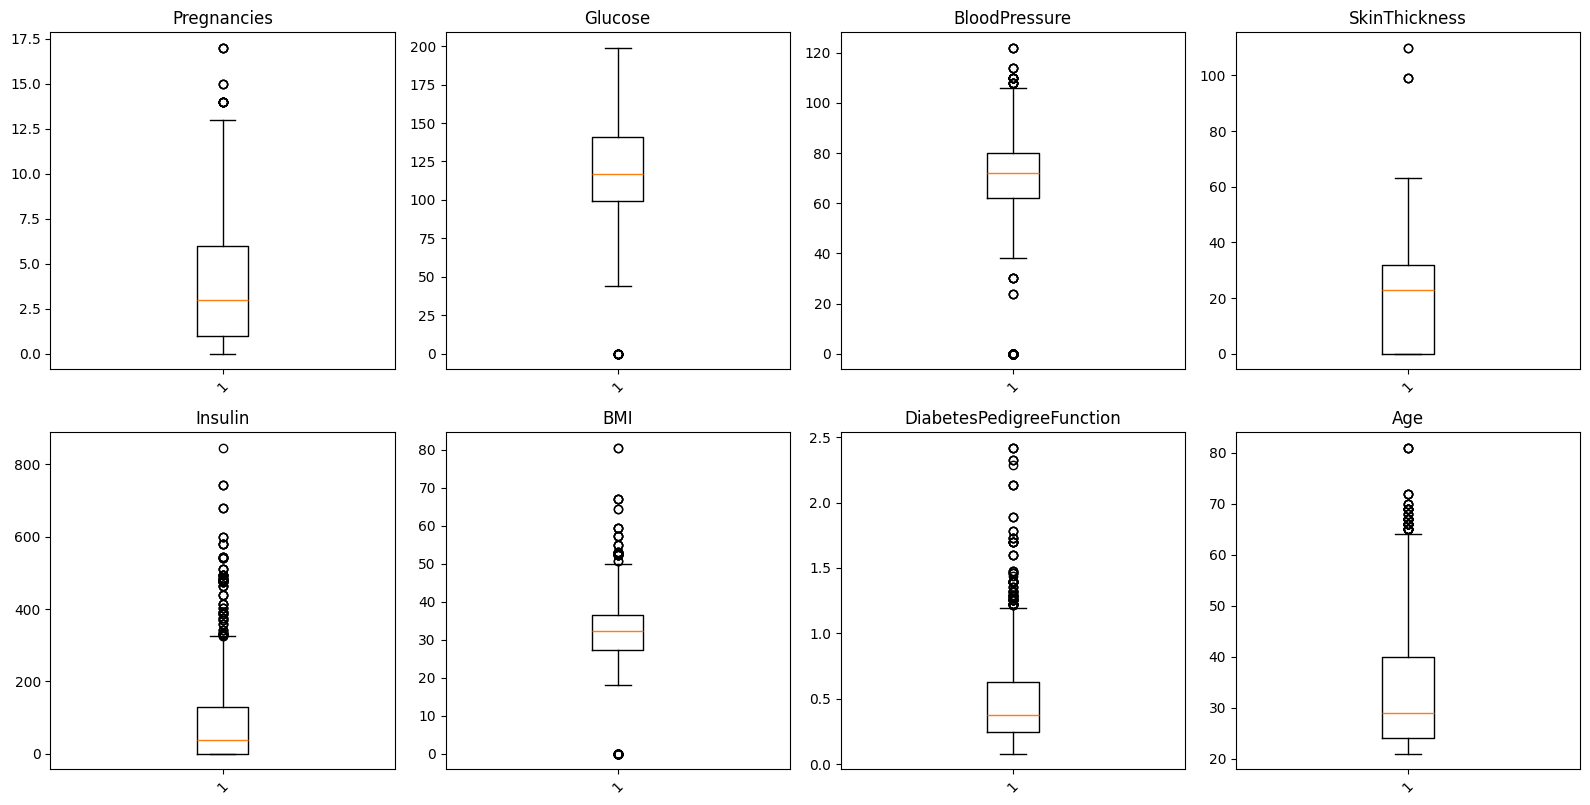

In [ ]:
import matplotlib.pyplot as plt

numerical_features = data.drop(['Id','Outcome'], axis=1)
n_features = len(numerical_features)

# Atur jumlah kolom dan baris subplot
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    axes[i].boxplot(data[col].dropna())
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

# Hapus subplot kosong jika ada
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# Cek jumlah data yang berisikan 0
print("Data yang 0 ada :",(data == 0).sum())

Data yang 0 ada : Id                             0
Pregnancies                  412
Glucose                       18
BloodPressure                125
SkinThickness                800
Insulin                     1330
BMI                           39
DiabetesPedigreeFunction       0
Age                            0
Outcome                     1816
dtype: int64


Karena Glucose, BloodPressure, BMI, dan SkinThickness memiliki nilai 0 yang secara medis tidak masuk akal, maka cara untuk menangani ini adalah dengan menggunakan nilai rata-rata dari masing-masing fitur.

In [ ]:
# Ubah nilai 0 di BMI menjadi nilai rata-rata pada fiturnya

data['BMI'] = data['BMI'].replace(0, data['BMI'].astype(float).mean())

In [ ]:
# Ubah nilai 0 di Glucose menjadi nilai rata-rata pada fiturnya

data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].astype(float).mean())

In [ ]:
# Ubah nilai 0 di SkinThickness menjadi nilai rata-rata pada fiturnya

data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].astype(float).mean())

In [ ]:
# Ubah nilai 0 di BloodPressure menjadi nilai rata-rata pada fiturnya

data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].astype(float).mean())

In [ ]:
# Tangani outlier untuk BMI (Outcome = 0)

bmi_mean = data[data['Outcome'] == 0]['BMI'].mean()
data.loc[(data['Outcome'] == 0) & ((data['BMI'] < 15) | (data['BMI'] > 50)), 'BMI'] = bmi_mean

In [ ]:
# Tangani outlier untuk Glucose (Outcome = 0)

glucose_mean = data[data['Outcome'] == 0]['Glucose'].mean()
data.loc[(data['Outcome'] == 0) & ((data['Glucose'] < 50) | (data['Glucose'] > 170)), 'Glucose'] = glucose_mean

In [ ]:
print(data.info())          # Informasi lengkap tentang dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   float64
 3   BloodPressure             2768 non-null   float64
 4   SkinThickness             2768 non-null   float64
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 216.4 KB
None


In [ ]:
data.describe()   # Distribusi nilai.

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,120.801268,72.256430,26.843041,80.127890,32.453907,0.471193,33.132225,0.343931
std,799.197097,3.323801,29.357177,12.007473,9.812960,112.301933,6.816151,0.325669,11.777230,0.475104
min,1.000000,0.000000,56.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,64.000000,20.824422,0.000000,27.575000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,116.000000,72.000000,23.000000,37.000000,32.137392,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,139.000000,80.000000,32.000000,130.000000,36.600000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Univariate Analysis

**Univariate Analysis**

Melakukan analisis terhadap fitur-fitur di dataset secara sendiri-sendiri

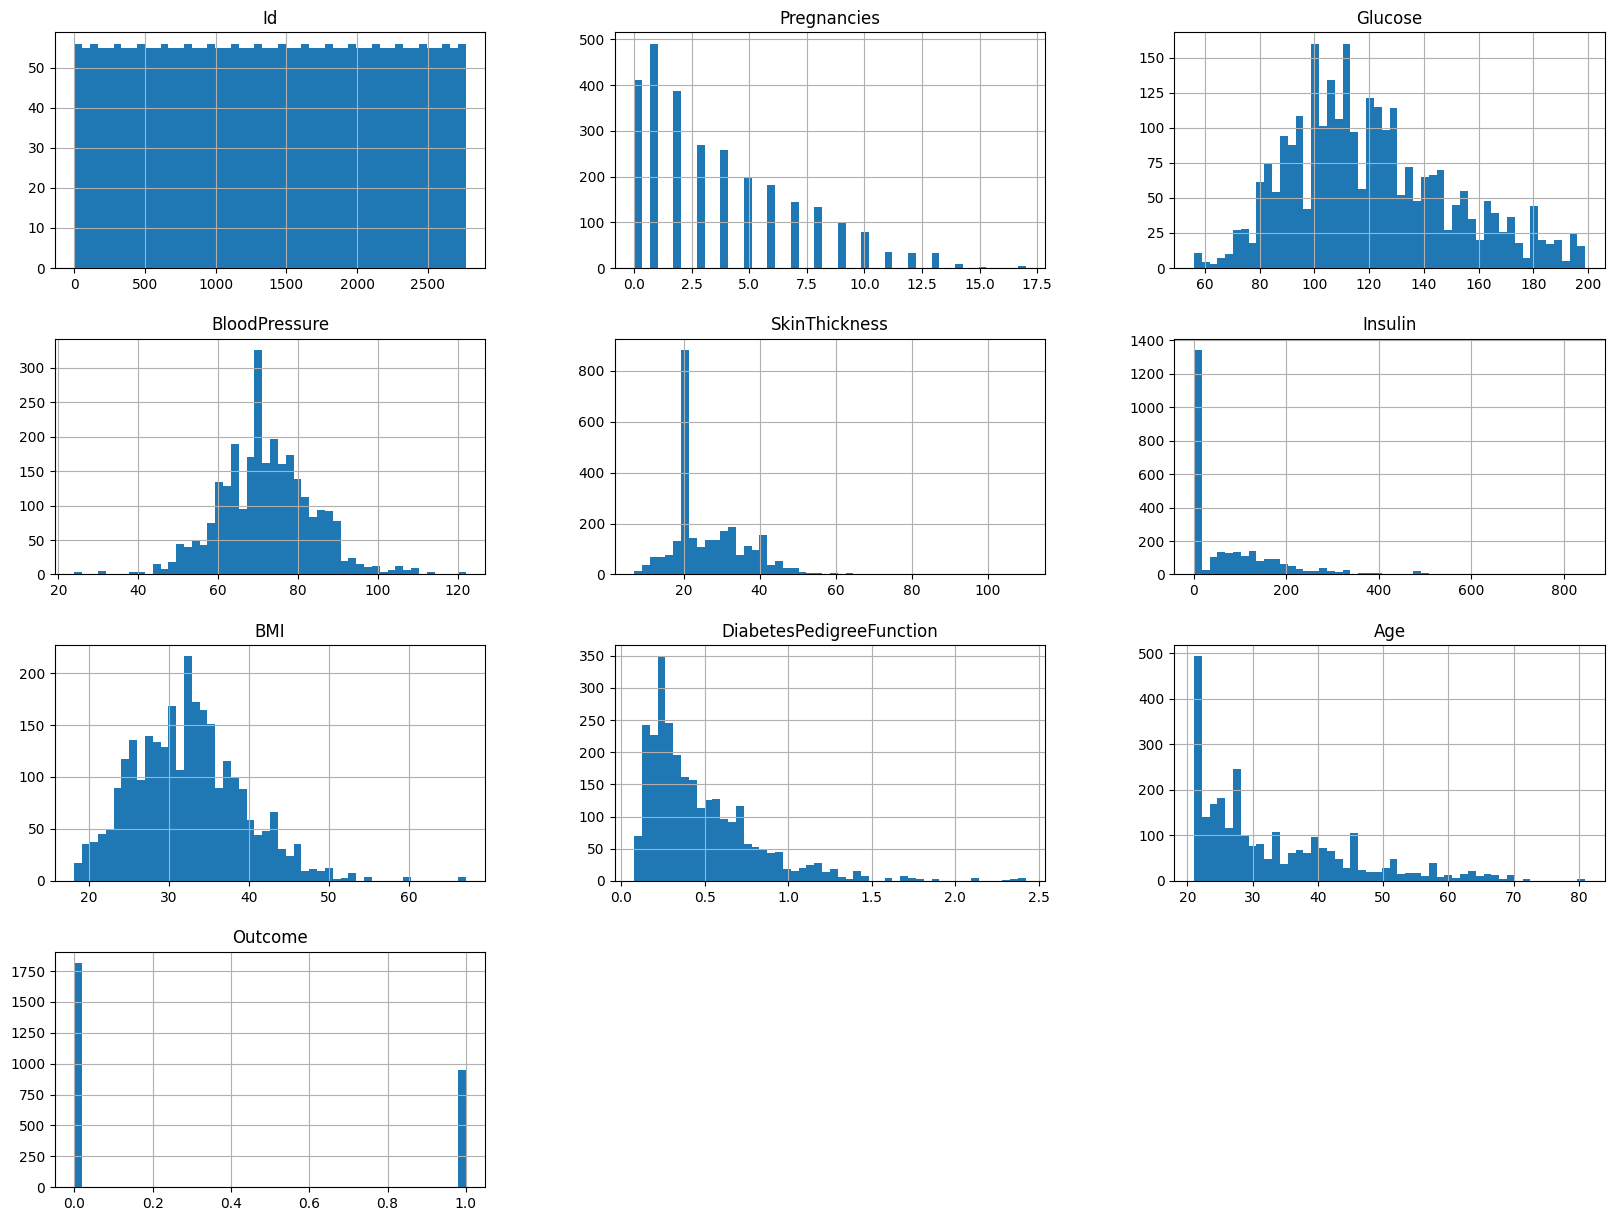

In [ ]:
# Menghasilkan histogram untuk semua kolom dalam dataset.
data.hist(bins=50, figsize=(20,15))
plt.show()

## Pregnancies

Melakukan analisis terhadap fitur Pregnancies

             jumlah sampel  persentase
Pregnancies                           
1                      491        17.7
0                      412        14.9
2                      387        14.0
3                      270         9.8
4                      259         9.4
5                      198         7.2
6                      181         6.5
7                      145         5.2
8                      134         4.8
9                       98         3.5
10                      78         2.8
11                      35         1.3
13                      32         1.2
12                      32         1.2
14                       9         0.3
17                       4         0.1
15                       3         0.1


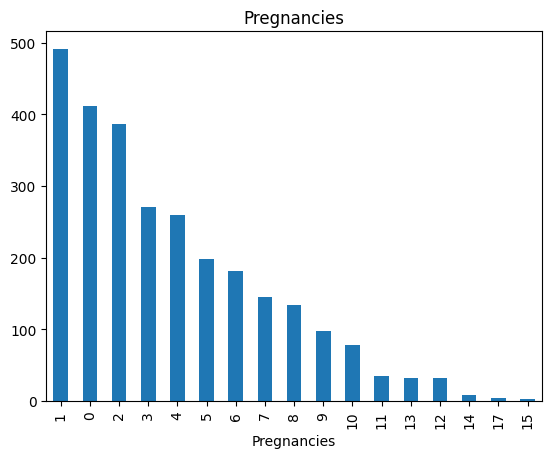

In [ ]:
# Distribusi Pregnancies

count = data['Pregnancies'].value_counts()
percent = 100*data['Pregnancies'].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title="Pregnancies");

## Glucose

Melakukan analisis terhadap fitur Glucose

         jumlah sampel  persentase
Glucose                           
99.0                66         2.4
100.0               61         2.2
102.0               52         1.9
129.0               51         1.8
106.0               50         1.8
...                ...         ...
62.0                 3         0.1
177.0                3         0.1
186.0                3         0.1
198.0                3         0.1
67.0                 3         0.1

[135 rows x 2 columns]


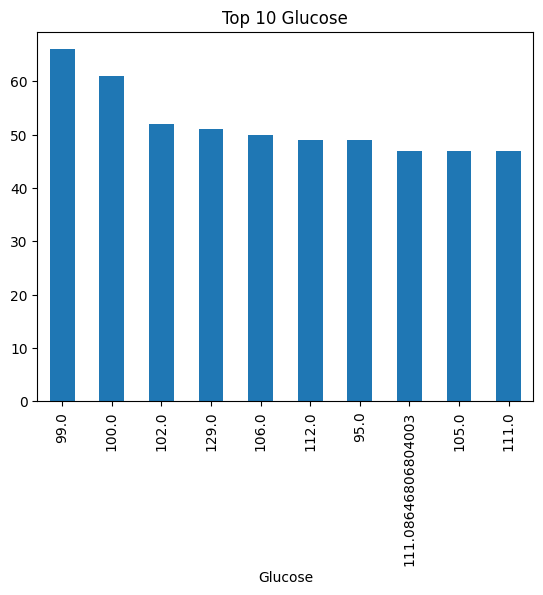

In [ ]:
# Distribusi Glucose
count = data['Glucose'].value_counts()
percent = 100*data['Glucose'].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
top10 = df['jumlah sampel'].head(10)
top10.plot(kind='bar', title="Top 10 Glucose");

## BloodPressure

Melakukan analisis terhadap fitur BloodPressure

               jumlah sampel  persentase
BloodPressure                           
70.000000                201         7.3
74.000000                197         7.1
78.000000                173         6.2
68.000000                170         6.1
64.000000                163         5.9
72.000000                162         5.9
80.000000                138         5.0
76.000000                132         4.8
60.000000                129         4.7
62.000000                128         4.6
69.134393                125         4.5
82.000000                113         4.1
66.000000                 95         3.4
88.000000                 92         3.3
84.000000                 84         3.0
90.000000                 77         2.8
58.000000                 75         2.7
86.000000                 74         2.7
50.000000                 44         1.6
56.000000                 43         1.6
54.000000                 42         1.5
52.000000                 40         1.4
75.000000       

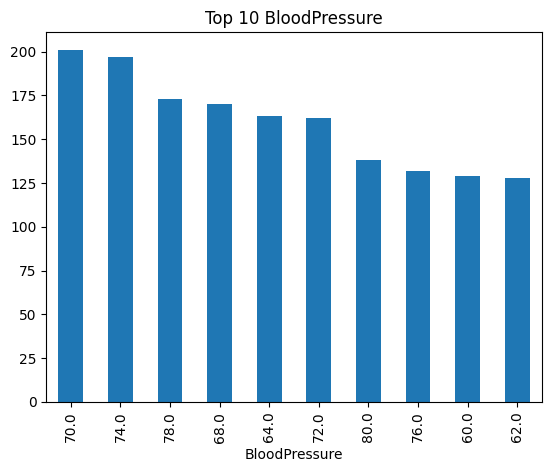

In [ ]:
# Distribusi BloodPressure
count = data['BloodPressure'].value_counts()
percent = 100*data['BloodPressure'].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
top10 = df['jumlah sampel'].head(10)
top10.plot(kind='bar', title="Top 10 BloodPressure");

## SkinThickness

Melakukan analisis terhadap fitur SkinThickness

               jumlah sampel  persentase
SkinThickness                           
20.824422                800        28.9
32.000000                114         4.1
30.000000                102         3.7
23.000000                 82         3.0
27.000000                 81         2.9
28.000000                 74         2.7
18.000000                 74         2.7
33.000000                 71         2.6
39.000000                 70         2.5
31.000000                 69         2.5
25.000000                 63         2.3
37.000000                 61         2.2
29.000000                 61         2.2
22.000000                 60         2.2
19.000000                 59         2.1
40.000000                 58         2.1
41.000000                 56         2.0
17.000000                 55         2.0
26.000000                 55         2.0
36.000000                 52         1.9
35.000000                 48         1.7
15.000000                 47         1.7
20.000000       

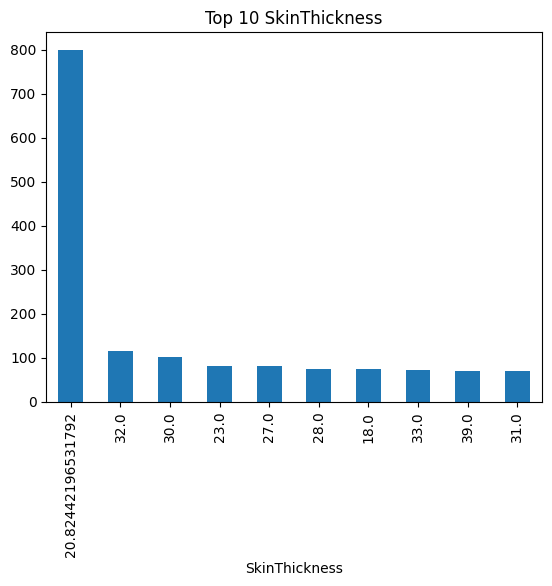

In [ ]:
# Distribusi SkinThickness
count = data['SkinThickness'].value_counts()
percent = 100*data['SkinThickness'].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
top10 = df['jumlah sampel'].head(10)
top10.plot(kind='bar', title="Top 10 SkinThickness");

## Insulin

Melakukan analisis terhadap fitur Insulin

         jumlah sampel  persentase
Insulin                           
0                 1330        48.0
105                 42         1.5
140                 33         1.2
130                 31         1.1
180                 30         1.1
...                ...         ...
235                  1         0.0
146                  1         0.0
846                  1         0.0
245                  1         0.0
543                  1         0.0

[187 rows x 2 columns]


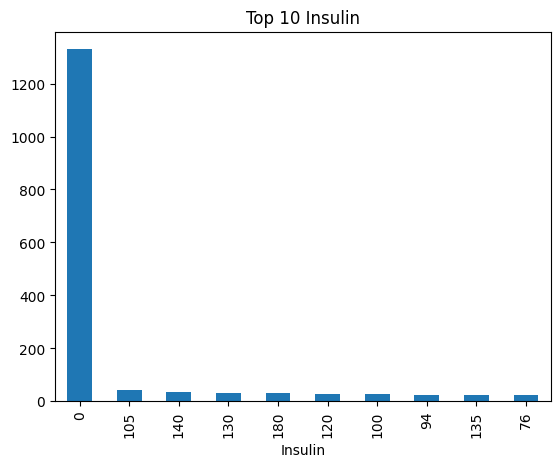

In [ ]:
# Distribusi Insulin
count = data['Insulin'].value_counts()
percent = 100*data['Insulin'].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
top10 = df['jumlah sampel'].head(10)
top10.plot(kind='bar', title="Top 10 Insulin");

## BMI

Melakukan analisis terhadap fitur BMI

           jumlah sampel  persentase
BMI                                 
32.000000             46         1.7
31.200000             45         1.6
31.600000             41         1.5
32.137392             39         1.4
33.300000             37         1.3
...                  ...         ...
39.300000              1         0.0
45.800000              1         0.0
19.900000              1         0.0
31.100000              1         0.0
28.100000              1         0.0

[250 rows x 2 columns]


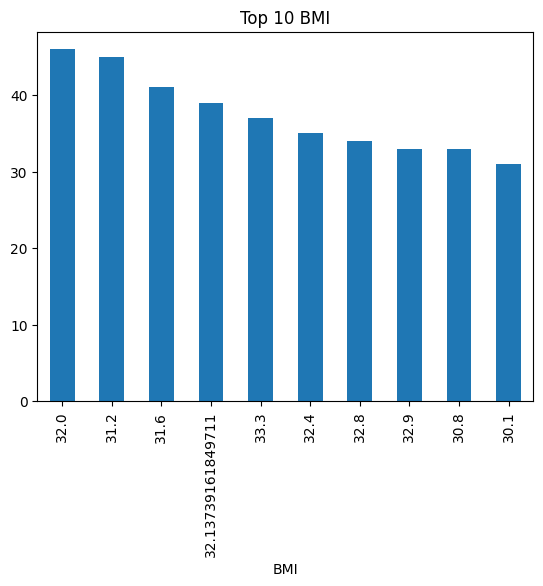

In [ ]:
# Distribusi BMI
count = data['BMI'].value_counts()
percent = 100*data['BMI'].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
top10 = df['jumlah sampel'].head(10)
top10.plot(kind='bar', title="Top 10 BMI");

## DiabetesPedigreeFunction

Melakukan analisis terhadap fitur DiabetesPedigreeFunction

                          jumlah sampel  persentase
DiabetesPedigreeFunction                           
0.258                                22         0.8
0.207                                20         0.7
0.268                                18         0.7
0.238                                18         0.7
0.261                                18         0.7
...                                 ...         ...
0.487                                 1         0.0
0.451                                 1         0.0
0.388                                 1         0.0
0.351                                 1         0.0
0.627                                 1         0.0

[523 rows x 2 columns]


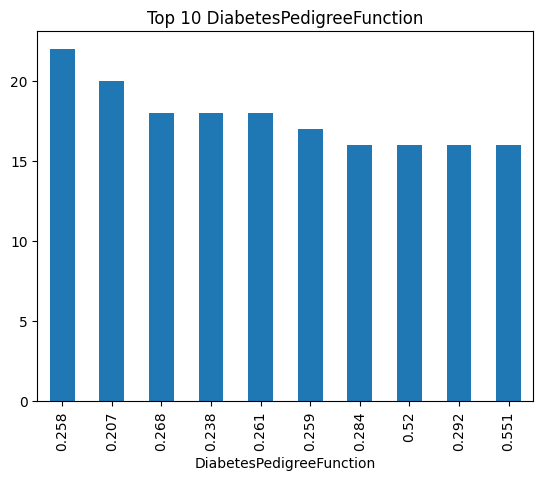

In [ ]:
# Distribusi DiabetesPedigreeFunction
count = data['DiabetesPedigreeFunction'].value_counts()
percent = 100*data['DiabetesPedigreeFunction'].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
top10 = df['jumlah sampel'].head(10)
top10.plot(kind='bar', title="Top 10 DiabetesPedigreeFunction");

## Age

Melakukan analisis terhadap fitur Age

     jumlah sampel  persentase
Age                           
22             264         9.5
21             229         8.3
25             182         6.6
24             168         6.1
23             141         5.1
28             133         4.8
26             117         4.2
27             113         4.1
29              99         3.6
31              82         3.0
30              77         2.8
41              73         2.6
37              67         2.4
42              66         2.4
36              62         2.2
38              61         2.2
33              60         2.2
45              57         2.1
34              48         1.7
46              48         1.7
40              48         1.7
39              48         1.7
32              47         1.7
43              47         1.7
35              37         1.3
50              29         1.0
58              28         1.0
44              28         1.0
52              27         1.0
47              23         0.8
51      

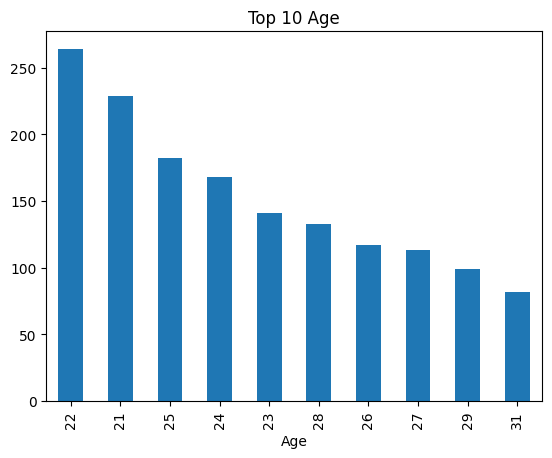

In [ ]:
# Distribusi Age
count = data['Age'].value_counts()
percent = 100*data['Age'].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
top10 = df['jumlah sampel'].head(10)
top10.plot(kind='bar', title="Top 10 Age");

# Multivariate Analysis

## Umur vs Kondisi Diabetes

Melakukan analisis terhadap fitur Umur dan Kondisi Diabetes (Outcome)

<ipython-input-117-0590934726f3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Age', data=data, palette={'0': 'lightblue', '1': 'khaki'})


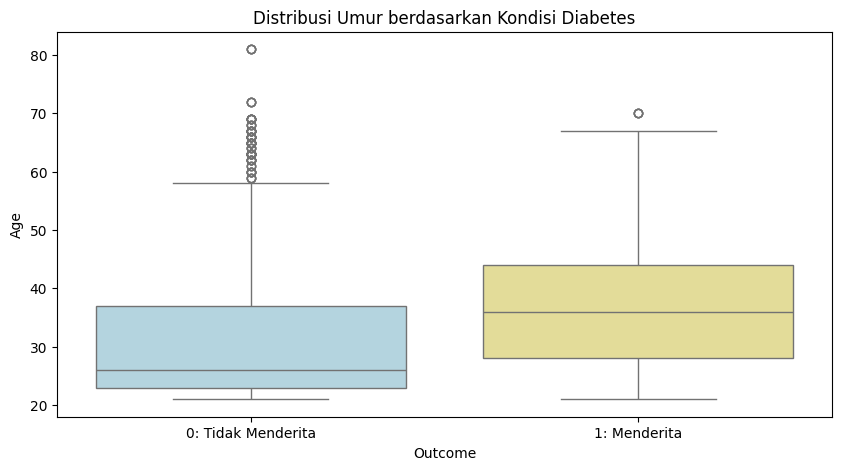

In [ ]:
plt.figure(figsize=(10,5))  # Menentukan ukuran plot
sns.boxplot(x='Outcome', y='Age',
            data=data,
            palette={'0': 'lightblue', '1': 'khaki'})    # Warna untuk masing-masing outcome
plt.title("Distribusi Umur berdasarkan Kondisi Diabetes")   # Judul plot
plt.xlabel("Outcome")   # Label sumbu x
plt.ylabel("Age")    # Label sumbu y
plt.xticks([0, 1], ['0: Tidak Menderita', '1: Menderita'])   # Keterangan pada sumbu x
plt.show()   # Menampilkan plot


Hasil :
1. yang tidak menderita diabetes (Outcome = 0) cenderung memiliki rentang umur yang lebih luas dengan median sekitar 30-an tahun.
2. yang menderita diabetes (Outcome = 1) cenderung memiliki rentang umur lebih tinggi, dengan median di atas 40 tahun.
3. Risiko diabetes sepertinya meningkat pada kelompok usia yang lebih tua.

Kesimpulan:
- Semakin tua umur, semakin besar kemungkinan menderita diabetes.

## BMI vs Kondisi Diabetes

Melakukan analisis terhadap fitur BMI dan Kondisi Diabetes (Outcome)

<ipython-input-118-86e5ac50656d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='BMI', data=data, palette={'0': 'lightblue', '1': 'khaki'})


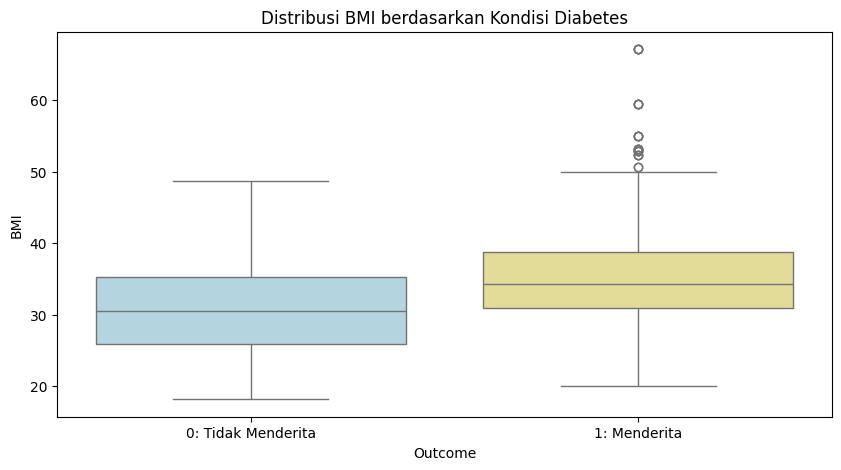

In [ ]:
plt.figure(figsize=(10,5))  # Menentukan ukuran plot
sns.boxplot(x='Outcome', y='BMI',
            data=data,
            palette={'0': 'lightblue', '1': 'khaki'})    # Warna untuk masing-masing outcome
plt.title("Distribusi Umur berdasarkan Kondisi Diabetes")   # Judul plot
plt.xlabel("Outcome")   # Label sumbu x
plt.ylabel("BMI")    # Label sumbu y
plt.xticks([0, 1], ['0: Tidak Menderita', '1: Menderita'])   # Keterangan pada sumbu x
plt.show()   # Menampilkan plot


Hasil :
1. yang tidak menderita diabetes memiliki distribusi BMI yang sedikit lebih rendah, dengan median sekitar 30.
2. yang menderita diabetes memiliki distribusi BMI yang lebih tinggi, dengan median sekitar 35, dan terdapat beberapa outlier dengan BMI di atas 50.
3. BMI yang lebih tinggi berhubungan dengan penderita diabetes.

Kesimpulan :
- Kelebihan berat badan atau obesitas (BMI tinggi) berkontribusi terhadap kemungkinan diabetes.

## Glukosa vs Kondisi Diabetes

Melakukan analisis terhadap fitur Glucose dan Kondisi Diabetes (Outcome)

<ipython-input-119-80d61d0b3b16>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Glucose', data=data, palette={'0': 'lightblue', '1': 'khaki'})


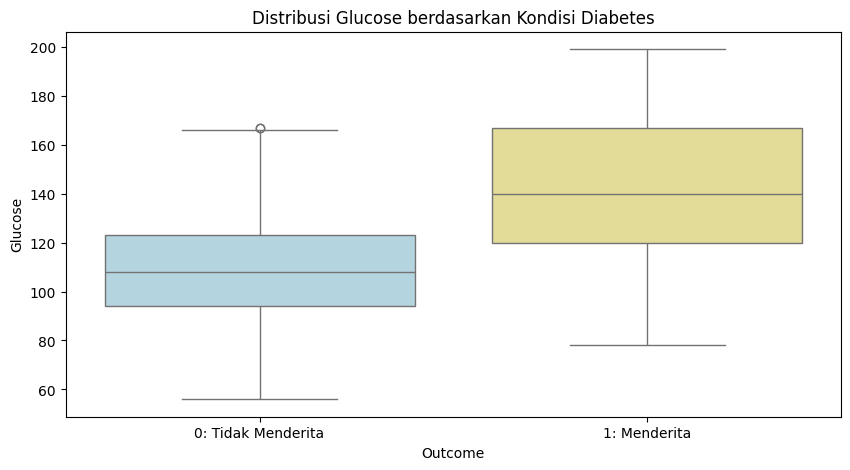

In [ ]:
plt.figure(figsize=(10,5))  # Menentukan ukuran plot
sns.boxplot(x='Outcome', y='Glukosa',
            data=data,
            palette={'0': 'lightblue', '1': 'khaki'})    # Warna untuk masing-masing outcome
plt.title("Distribusi Umur berdasarkan Kondisi Diabetes")   # Judul plot
plt.xlabel("Outcome")   # Label sumbu x
plt.ylabel("Glukosa")    # Label sumbu y
plt.xticks([0, 1], ['0: Tidak Menderita', '1: Menderita'])   # Keterangan pada sumbu x
plt.show()   # Menampilkan plot


Hasil :
1. yang tidak menderita diabetes memiliki distribusi glukosa yang lebih rendah, dengan median sekitar 110–120.
2. yang menderita diabetes memiliki distribusi glukosa yang lebih tinggi, dengan median sekitar 140–150.
3. Glukosa darah yang lebih tinggi berhubungan dengan penderita diabetes.

Kesimpulan :
- Kadar glukosa darah yang lebih tinggi secara jelas terkait dengan individu yang menderita diabetes.

## Pairplot berdasarkan Outcome

Melakukan analisis hubungan fitur Umur, Glukosa, BMI, Insulin dengan Kondisi Diabetes (Outcome)

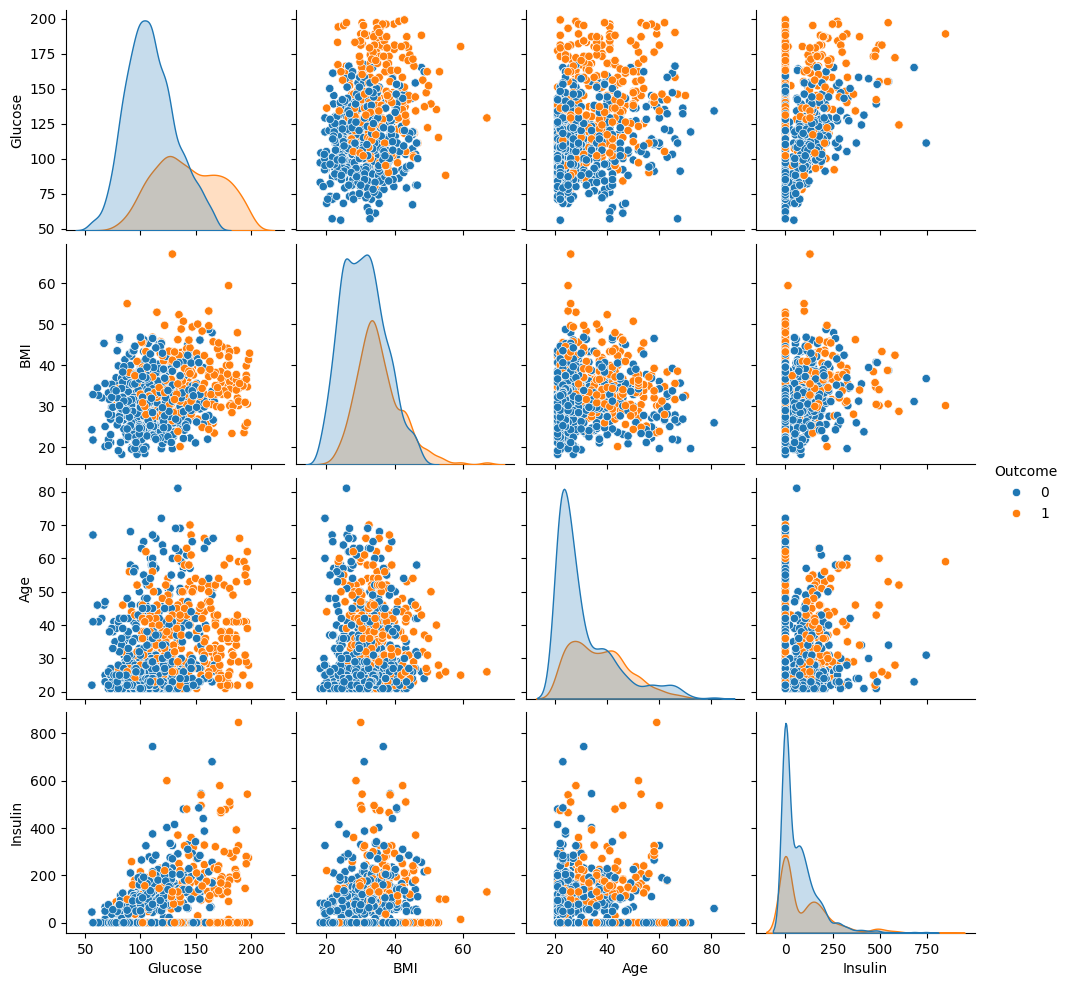

In [ ]:
# Grafik scatter yang menunjukkan hubungan antar fitur untuk masing-masing kategori Outcome

sns.pairplot(data, hue="Outcome", vars=["Glucose", "BMI", "Age", "Insulin"])

## Correlation Matrix

Membuat Correlation Matrix

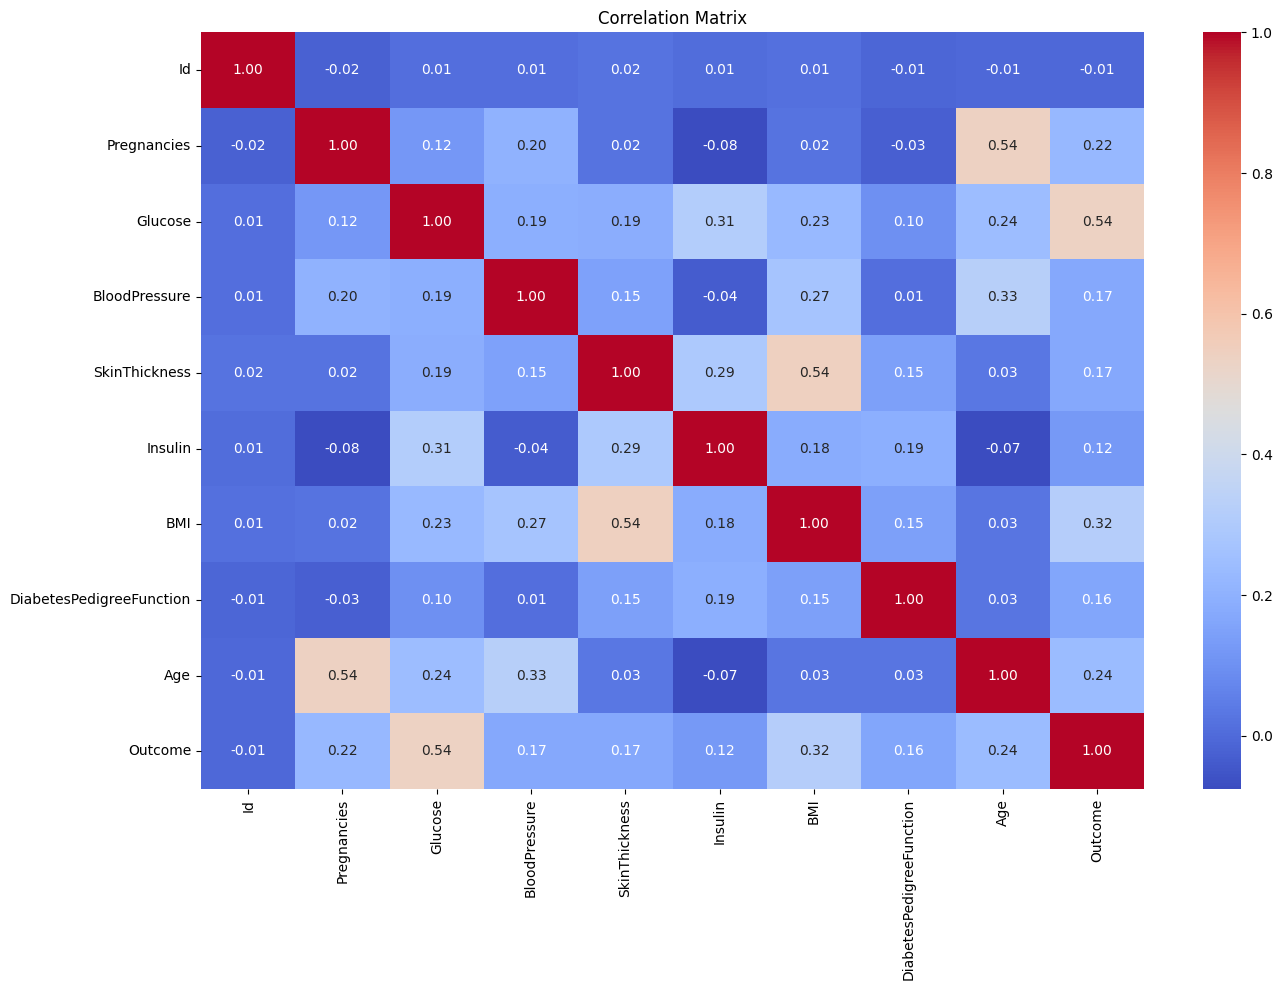

In [ ]:
# Membuat Correlation Matrix
plt.figure(figsize=(14, 10))
correlation_matrix = data.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

Mmebuat Correlation Matrix tetapi, dengan menghasilkan angka

In [ ]:
# Korelasi fitur terhadap Outcome
correlations = data.corr()['Outcome'].abs().sort_values(ascending=False)
display(correlations)

,Outcome
Outcome,1.000000
Glucose,0.535222
BMI,0.317163
Age,0.237050
Pregnancies,0.223796
SkinThickness,0.171925
BloodPressure,0.169353
DiabetesPedigreeFunction,0.160664
Insulin,0.123646
Id,0.006298


Mmebuat Correlation Matrix tetapi, dengan menghasilkan Bar Plot

<ipython-input-153-5bf8c7bb1768>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


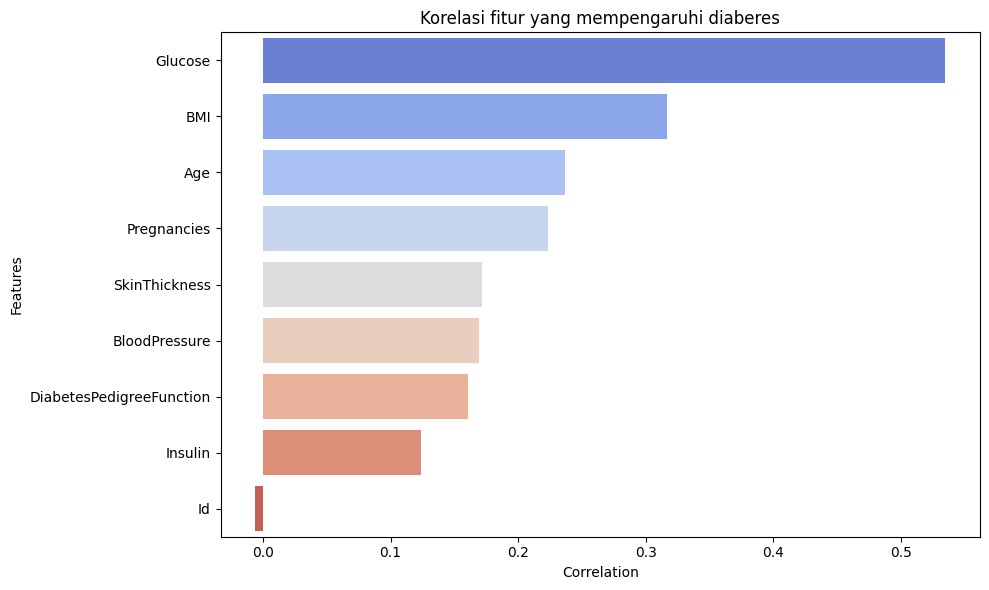

In [ ]:
# Menghitung korelasi semua fitur terhadap fitur Outcome
correlation_with_outcome = data.corr()['Outcome'].sort_values(ascending=False)

# Mengabaikan fitur Outcome itu sendiri
correlation_with_outcome = correlation_with_outcome.drop('Outcome')

# Membuat diagram batang
plt.figure(figsize=(10, 6))
sns.barplot(
    y=correlation_with_outcome.index,
    x=correlation_with_outcome.values,
    palette='coolwarm'
)
plt.title('Korelasi fitur yang mempengaruhi diaberes')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


Kesimpulan :
- Berdasarkan data yang diperolah, menunjukan Fitur utama yang memengaruhi kemungkinan diabetes adalah Glucose, BMI, Age, dan Pregnancies. ke-4 faktor ini sangat berpengaruh pada perhitungan prediksi diabetes.

# Data Preparation

## Data Spliting

**Pada projek ini saya menggunakan split data dengan rasio 80:20**

In [ ]:
X = data.drop(['Id','Outcome'], axis=1)   # Menghapus kolom Id dan Outcome dari fitur
y = data["Outcome"]    # Variabel target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Menampilkan jumlah data pada training dan testing set

print(f'Total nilai di train: {len(X_train)}')
print(f'Total nilai di test: {len(X_test)}')

Total nilai di train: 2214
Total nilai di test: 554


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   float64
 3   BloodPressure             2768 non-null   float64
 4   SkinThickness             2768 non-null   float64
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 216.4 KB


In [ ]:
# Menampilkan jumlah data pada training

print("Nilai 0 pada y = ",(y_train == 0).sum())
print("Nilai 1 pada y = ",(y_train == 1).sum())

Nilai 0 pada y =  1449
Nilai 1 pada y =  765


## SMOTE

Kita lihat sebelumnya, karena data training dengan target Outcome = 1 dan target Outcome = 0 berbeda cukup jauh, maka saya menggunakan SMOTE untuk menyeimbangkan datanya

In [ ]:
# SMOTE (Synthetic Minority Oversampling Technique)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Distribusi sebelum SMOTE:", y_train.value_counts())
print("Distribusi setelah SMOTE:", pd.Series(y_resampled).value_counts())

Distribusi sebelum SMOTE: Outcome
0    1449
1     765
Name: count, dtype: int64
Distribusi setelah SMOTE: Outcome
1    1449
0    1449
Name: count, dtype: int64


## Standardisasi Fitur

Standardisasi Fitur untuk digunakan pada beberapa model (SVM dan KNN).

In [ ]:
# Standardisasi Fitur

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Train Model

Setelah melakukan data preparation, Selanjutnya adalah melatih model untuk melakukan prediksi terhadap penyakit diabetes berdasarkan riwayat kesehatan

## Random Forest

In [ ]:
# Menyimpan hasil evaluasi

results = []

Melatih model Random Forest

In [ ]:
# Melatih model Random Forest

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

Prediksi & evaluasi

In [ ]:
# Prediksi & evaluasi

y_pred_rf = rf_classifier.predict(X_test)

Menyimpan Hasil Evaluasi Model

In [ ]:
# Menyimpan Hasil Evaluasi Model

results.append({
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "F1-Score": f1_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf)
})

Membuat Confusion Matrix

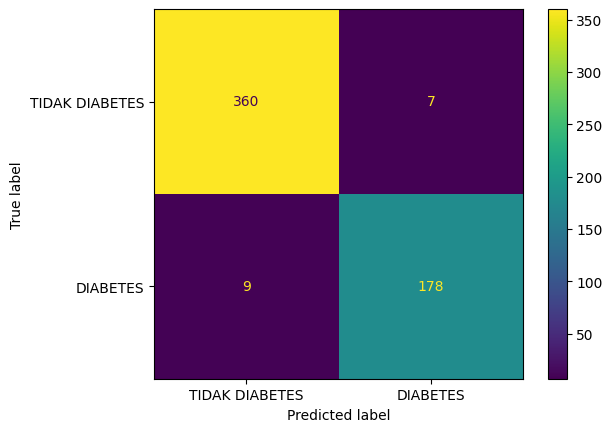

In [ ]:
# Membuat Confusion Matrix

cm = confusion_matrix(y_test, y_pred_cat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["TIDAK DIABETES", "DIABETES"])
disp.plot()

Berdasarkan confusion matrix diatas:

- 360 responden diklasifikasikan benar sebagai TIDAK DIABETES (True Negative).
- 178 responden diklasifikasikan benar sebagai DIABETES (True Positive).
- 7 responden diklasifikasikan salah sebagai DIABETES, padahal sebenarnya TIDAK DIABETES (False Positive).
- 9 responden diklasifikasikan salah sebagai TIDAK DIABETES, padahal sebenarnya DIABETES (False Negative).

## Decision Tree

Melatih model Decision Tree

In [ ]:
# Melatih model Decision Tree

dt_model = DecisionTreeClassifier()
dt_model.fit(X_resampled, y_resampled)

DecisionTreeClassifier()

Prediksi & evaluasi

In [ ]:
# Prediksi & evaluasi
y_pred_dt = dt_model.predict(X_test_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Menyimpan Hasil Evaluasi Model

In [ ]:
# Menyimpan Hasil Evaluasi Model

results.append({
    "Model": "Decision Tree",
    "Accuracy": accuracy_score(y_test, y_pred_dt),
    "F1-Score": f1_score(y_test, y_pred_dt),
    "Recall": recall_score(y_test, y_pred_dt)
})

Membuat Confusion Matrix

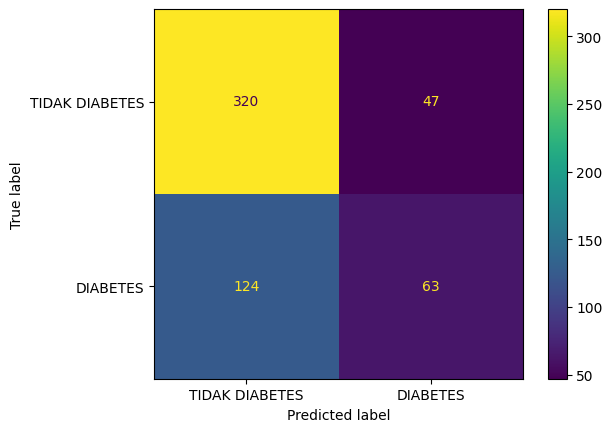

In [ ]:
# Membuat Confusion Matrix

cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["TIDAK DIABETES", "DIABETES"])
disp.plot()

Berdasarkan confusion matrix diatas:

- 320 responden diklasifikasikan benar sebagai TIDAK DIABETES (True Negative).
- 63 responden diklasifikasikan benar sebagai DIABETES (True Positive).
- 47 responden diklasifikasikan salah sebagai DIABETES, padahal sebenarnya TIDAK DIABETES (False Positive).
- 124 responden diklasifikasikan salah sebagai TIDAK DIABETES, padahal sebenarnya DIABETES (False Negative).

## AdaBoosting

Melatih model AdaBoosting

In [ ]:
# Melatih model AdaBoosting

ada_model_dt = AdaBoostClassifier(estimator= dt_model, n_estimators=50, random_state=42)
ada_model_dt.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=42)

Prediksi & evaluasi

In [ ]:
# Prediksi & evaluasi

y_pred_ada = ada_model_dt.predict(X_test)

Menyimpan Hasil Evaluasi Model

In [ ]:
# Menyimpan Hasil Evaluasi Model

results.append({
    "Model": "AdaBoosting",
    "Accuracy": accuracy_score(y_test, y_pred_ada),
    "F1-Score": f1_score(y_test, y_pred_ada),
    "Recall": recall_score(y_test, y_pred_ada)
})

Membuat Confusion Matrix

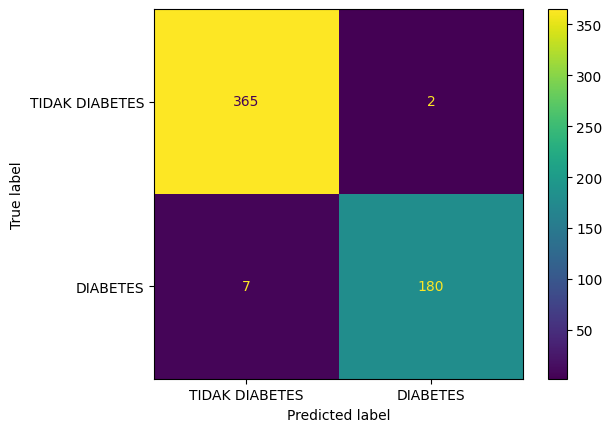

In [ ]:
# Membuat Confusion Matrix

cm = confusion_matrix(y_test, y_pred_ada)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["TIDAK DIABETES", "DIABETES"])
disp.plot()

Berdasarkan confusion matrix diatas:

- 365 responden diklasifikasikan benar sebagai TIDAK DIABETES (True Negative).
- 180 responden diklasifikasikan benar sebagai DIABETES (True Positive).
- 2 responden diklasifikasikan salah sebagai DIABETES, padahal sebenarnya TIDAK DIABETES (False Positive).
- 7 responden diklasifikasikan salah sebagai TIDAK DIABETES, padahal sebenarnya DIABETES (False Negative).

## SVM

Melatih model SVM

In [ ]:
# Melatih model SVM
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_resampled)

SVC(C=1, random_state=42)

Prediksi & evaluasi

In [ ]:
# Prediksi & evaluasi
y_pred_svm = svm_model.predict(X_test_scaled)

Menyimpan Hasil Evaluasi Model

In [ ]:
# Menyimpan Hasil Evaluasi Model

results.append({
    "Model": "SVM",
    "Accuracy": accuracy_score(y_test, y_pred_svm),
    "F1-Score": f1_score(y_test, y_pred_svm),
    "Recall": recall_score(y_test, y_pred_svm)
})

Membuat Confusion Matrix

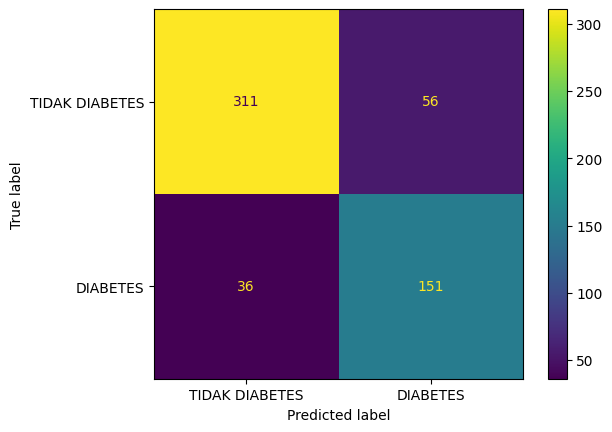

In [ ]:
# Membuat Confusion Matrix

cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["TIDAK DIABETES", "DIABETES"])
disp.plot()

Berdasarkan confusion matrix diatas:

- 311 responden diklasifikasikan benar sebagai TIDAK DIABETES (True Negative).
- 151 responden diklasifikasikan benar sebagai DIABETES (True Positive).
- 56 responden diklasifikasikan salah sebagai DIABETES, padahal sebenarnya TIDAK DIABETES (False Positive).
- 36 responden diklasifikasikan salah sebagai TIDAK DIABETES, padahal sebenarnya DIABETES (False Negative).

## KNN

Melatih model KNN

In [ ]:
# Melatih model KNN

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_resampled)

KNeighborsClassifier()

Prediksi & evaluasi

In [ ]:
# Prediksi & evaluasi

y_pred_knn = knn_model.predict(X_test_scaled)

Menyimpan Hasil Evaluasi Model

In [ ]:
# Menyimpan Hasil Evaluasi Model

results.append({
    "Model": "KNN",
    "Accuracy": accuracy_score(y_test, y_pred_knn),
    "F1-Score": f1_score(y_test, y_pred_knn),
    "Recall": recall_score(y_test, y_pred_knn)
})

Membuat Confusion Matrix

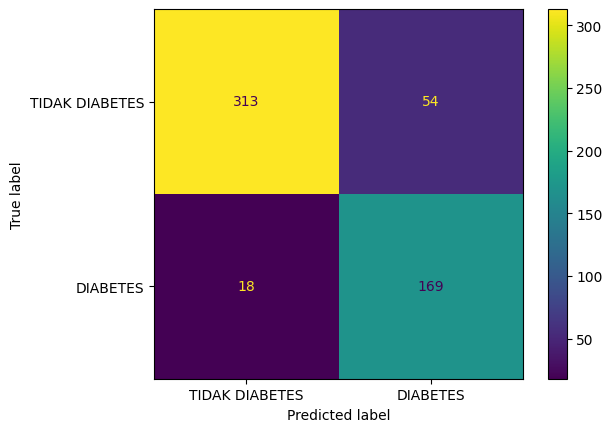

In [ ]:
# Membuat Confusion Matrix

cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["TIDAK DIABETES", "DIABETES"])
disp.plot()

Berdasarkan confusion matrix diatas:

- 313 responden diklasifikasikan benar sebagai TIDAK DIABETES (True Negative).
- 169 responden diklasifikasikan benar sebagai DIABETES (True Positive).
- 54 responden diklasifikasikan salah sebagai DIABETES, padahal sebenarnya TIDAK DIABETES (False Positive).
- 18 responden diklasifikasikan salah sebagai TIDAK DIABETES, padahal sebenarnya DIABETES (False Negative).

# Evaluasi Model

Menampilkan evaluasi model

In [ ]:
# Menampilkan evaluasi model

results_df = pd.DataFrame(results)
print(results_df)

           Model  Accuracy  F1-Score    Recall
0  Random Forest  0.981949  0.972973  0.962567
1  Decision Tree  0.691336  0.424242  0.336898
2    AdaBoosting  0.983755  0.975610  0.962567
3            SVM  0.833935  0.766497  0.807487
4            KNN  0.870036  0.824390  0.903743


Kesimpulan Akhir :
- Berdasarkan data yang diperolah, menunjukan Fitur utama yang memengaruhi kemungkinan diabetes adalah Glucose, BMI, Age, dan Pregnancies. ke-4 faktor ini sangat berpengaruh pada perhitungan prediksi diabetes.
- Setelah menguji data menggunakan 5 model machine learning, Model AdaBoosting memberikan performa terbaik dan dapat diandalkan untuk klasifikasi kasus diabetes dibandingkan model lainnya berdasarkan skor akurasi, skor F1, dan jumlah kesalahan klasifikasi yang paling sedikit.
- Model ini dapat digunakan untuk membantu pengambilan keputusan medis awal, terutama pada tahap skrining atau pencegahan.